In [1]:
import numpy as np    # for array operations
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import tensorflow as tf
import os    #  to specify location of images
from time import time
import keras
import cv2 
from tqdm import tqdm
import random
import pickle # to save the data



In [2]:
DIRECTORY=r"/Users/shivanimiraje/Documents/miniproject/data"
CATEGORIES=['real' , 'forged']

/Users/shivanimiraje/Documents/miniproject/data/real
/Users/shivanimiraje/Documents/miniproject/data/forged


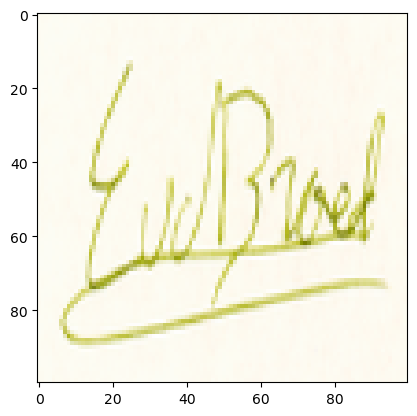

In [3]:
IMG_SIZE=100

data = [] 
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category) # this will join two different paths
    print(folder)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):  # this will list all the files present in folder
        try:
            img_path = os.path.join(folder, img) # path of image
            img_arr = cv2.imread(img_path) # reading the image of that path(img_path) here
            img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            data.append([img_arr, label])
            
            plt.imshow(img_arr)
        except Exception as e:
            pass

In [4]:
len(data) # these many images

122

In [5]:
random.shuffle(data)

In [6]:
 data[0]

[array([[[253, 251, 240],
         [253, 251, 239],
         [253, 252, 242],
         ...,
         [254, 250, 237],
         [253, 251, 241],
         [253, 251, 239]],
 
        [[253, 251, 240],
         [253, 252, 240],
         [253, 252, 241],
         ...,
         [254, 248, 235],
         [253, 251, 240],
         [253, 251, 239]],
 
        [[253, 251, 239],
         [252, 252, 242],
         [253, 251, 240],
         ...,
         [253, 248, 236],
         [253, 251, 241],
         [253, 251, 240]],
 
        ...,
 
        [[253, 252, 240],
         [253, 252, 239],
         [253, 252, 240],
         ...,
         [253, 250, 238],
         [253, 252, 240],
         [253, 252, 241]],
 
        [[253, 252, 239],
         [252, 252, 240],
         [253, 252, 241],
         ...,
         [253, 251, 239],
         [253, 252, 241],
         [253, 251, 241]],
 
        [[253, 251, 238],
         [253, 251, 239],
         [253, 252, 242],
         ...,
         [253, 251, 240],
  

In [7]:
X = []
y = []
for features, labels in data:
    X.append(features)
    y.append(labels)
    

In [8]:
X = np.array(X)
y = np.array(y)

In [9]:
pickle.dump(X, open('X.pkl', 'wb')) # wb="write in binary"
pickle.dump(y, open('y.pkl', 'wb'))

In [10]:
X = pickle.load(open('X.pkl', 'rb')) # rb="read in binary"
y = pickle.load(open('y.pkl', 'rb')) 

In [11]:
X = X/255 # normalizing the array

In [12]:
X         # array of all the images

array([[[[0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.9372549 ],
         [0.99215686, 0.98823529, 0.94901961],
         ...,
         [0.99607843, 0.98039216, 0.92941176],
         [0.99215686, 0.98431373, 0.94509804],
         [0.99215686, 0.98431373, 0.9372549 ]],

        [[0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98823529, 0.94117647],
         [0.99215686, 0.98823529, 0.94509804],
         ...,
         [0.99607843, 0.97254902, 0.92156863],
         [0.99215686, 0.98431373, 0.94117647],
         [0.99215686, 0.98431373, 0.9372549 ]],

        [[0.99215686, 0.98431373, 0.9372549 ],
         [0.98823529, 0.98823529, 0.94901961],
         [0.99215686, 0.98431373, 0.94117647],
         ...,
         [0.99215686, 0.97254902, 0.9254902 ],
         [0.99215686, 0.98431373, 0.94509804],
         [0.99215686, 0.98431373, 0.94117647]],

        ...,

        [[0.99215686, 0.98823529, 0.94117647],
         [0.99215686, 0.98823529, 0.9372549 ]

In [13]:
X.shape

(122, 100, 100, 3)

In [14]:
y     # arrays of 0s and 1s

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [15]:
y.shape

(122,)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())

model.add(Dense(512, input_shape = X.shape[1:], activation = 'relu'))     

model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

2023-02-22 18:29:12.278127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.fit(X, y, epochs = 50, validation_split = 0.5)

Epoch 1/50
2/2 [==============================] - 1s 431ms/step - loss: 2.1522 - accuracy: 0.2623 - val_loss: 1.3143 - val_accuracy: 0.4918
Epoch 2/50
2/2 [==============================] - 1s 304ms/step - loss: 1.0600 - accuracy: 0.5082 - val_loss: 0.6985 - val_accuracy: 0.4918
Epoch 3/50
2/2 [==============================] - 0s 292ms/step - loss: 1.0194 - accuracy: 0.4262 - val_loss: 0.6955 - val_accuracy: 0.4918
Epoch 4/50
2/2 [==============================] - 0s 290ms/step - loss: 1.3699 - accuracy: 0.5082 - val_loss: 1.1595 - val_accuracy: 0.4918
Epoch 5/50
2/2 [==============================] - 1s 341ms/step - loss: 0.9295 - accuracy: 0.5082 - val_loss: 0.7246 - val_accuracy: 0.5082
Epoch 6/50
2/2 [==============================] - 0s 292ms/step - loss: 0.7807 - accuracy: 0.4918 - val_loss: 0.8757 - val_accuracy: 0.5082
Epoch 7/50
2/2 [==============================] - 0s 290ms/step - loss: 0.8776 - accuracy: 0.4918 - val_loss: 0.7841 - val_accuracy: 0.5082
Epoch 8/50
2/2 [====

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0

In [20]:
model.save('signatureforgery1CNN.model')

INFO:tensorflow:Assets written to: signatureforgery1CNN.model/assets


INFO:tensorflow:Assets written to: signatureforgery1CNN.model/assets


In [21]:
CATEGORIES = ['forge', 'genuine']
image = input("Enter path of new image to be tested : ")


def prepare(image):
    IMG_SIZE = 100
    img_arr = cv2.imread(image)
    img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
    return img_arr.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

Enter path of new image to be tested : /Users/shivanimiraje/Documents/miniproject/data/forged/021009_001.png


In [22]:
 model=keras.models.load_model(r"/Users/shivanimiraje/signatureforgery1CNN.model")

In [23]:
prediction = model.predict([prepare(image)])
print(CATEGORIES[int(prediction[0][0])])

1/1 [==============================] - 0s 122ms/step
forge
